Билет 176, вариант 5

Датасет:
https://www.kaggle.com/datasets/lodetomasi1995/income-classification

Задача состоит в том, чтобы определить, зарабатывает ли человек более 50 тысяч долларов в год.

Атрибуты:
- age - возраст;
- workclass - рабочий класс;
- fnlwgt - 
- education - образование;
- education-num - число образований;
- marital-status - семейное положение;
- occupation - занятость;
- relationship - отношения;
- race - раса;
- sex - пол;
- capital-gain - прирост капитала;
- capital-loss - траты;
- hours-per-week - часов в неделю работы;
- native-country - родная страна;
- income - прибыль.

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.manifold import TSNE

In [37]:
data = pd.read_csv('income_evaluation.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Изменим значения целевой переменной на 0/1

In [62]:
data[' income'][data[' income'] == ' <=50K'] = 0
data[' income'][data[' income'] == ' 50K'] = 0
data[' income'][data[' income'] == ' >50K'] = 1
data[' income'] = data[' income'].astype('int64')
data.head()

C:\Users\anast\AppData\Local\Temp/ipykernel_15692/3890974360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[' income'][data[' income'] == ' <=50K'] = 0
C:\Users\anast\AppData\Local\Temp/ipykernel_15692/3890974360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[' income'][data[' income'] == ' 50K'] = 0
C:\Users\anast\AppData\Local\Temp/ipykernel_15692/3890974360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Мы имеем очень много нечисловых параметров. Удалим все колонки, которые имеют не числовой тип, в силу ограничения по времени и того, что обработка данных не является главной целью задания.

In [63]:
data_clear = pd.DataFrame([])

for col in ['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week', ' income']:
    data_clear[col] = data[col]
    
data_clear.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [64]:
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              32561 non-null  int64
 1    fnlwgt          32561 non-null  int64
 2    education-num   32561 non-null  int64
 3    capital-gain    32561 non-null  int64
 4    capital-loss    32561 non-null  int64
 5    hours-per-week  32561 non-null  int64
 6    income          32561 non-null  int64
dtypes: int64(7)
memory usage: 1.7 MB


Делим на тестовую и обучающую выборки

In [66]:
Y = data_clear[' income']
X = data_clear.drop([' income'], axis=1)

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True) # размер тестовой выборки 20%

Обучение модели

In [71]:
# Функция для отрисовки матриц

import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def matrix_drow(y_test, y_pred):
  class_names = [0, 1]
  fig, ax = plt.subplots()
  ticks = np.arange(len(class_names))
  plt.xticks(ticks, class_names)
  plt.yticks(ticks, class_names)

  sns.heatmap(pd.DataFrame(
      metrics.confusion_matrix(y_test, y_pred)),
      annot=True)
  plt.ylabel('Действительные значения')
  plt.xlabel('Предсказанные значения')

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5026
           1       0.64      0.30      0.41      1487

    accuracy                           0.80      6513
   macro avg       0.73      0.63      0.65      6513
weighted avg       0.78      0.80      0.77      6513



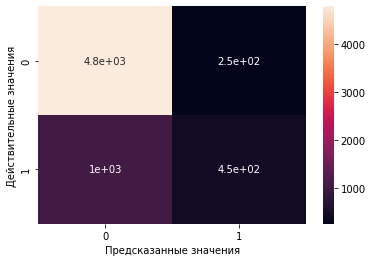

In [72]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
matrix_drow(y_test, y_pred)

Модель, в целом, неплохая, но старается выдавать ложноотрицательные результаты, так как класс "0" имеет больше экземпляров в выборке

In [77]:
model = TSNE(learning_rate=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
matrix_drow(y_test, y_pred)

c:\Users\anast\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


По идее с наилучшим подбором параметров обучение без учителя должно иметь хорошую точность, но модель не успевает посчитаться